In [93]:
import pandas as pd

In [94]:
df = pd.read_csv('train.csv', dtype={'date':object, 'fullVisitorId':object, 'visitId':object})
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [95]:
df.shape

(12283, 12)

In [96]:
df.fullVisitorId.nunique()

9997

In [97]:
df.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                 object
visitNumber              int64
visitStartTime           int64
dtype: object

In [98]:
import json

In [99]:
dicionarios = ['device', 'geoNetwork', 'trafficSource', 'totals']

In [100]:
for coluna in dicionarios:
    df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]]))

df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN


In [101]:
df = df.drop(columns=dicionarios, axis=1)

A coluna adwordsClickInfo é composta por dicionários e não representa importância no trabalho.

In [102]:
df = df.drop(columns=['adwordsClickInfo'], axis=1)

Colunas com somente um único valor não são úteis para o treinamento.

In [103]:
colunas_na = [coluna for coluna in df.columns if df[coluna].nunique() == 1]
df = df.drop(columns=colunas_na, axis=1)

In [104]:
quantitativas = ['hits', 'pageviews', 'transactionRevenue']

In [105]:
colunas_df_quantitativas = quantitativas
quantitativas.append('fullVisitorId')

df_quantitativas = df[quantitativas]
df_quantitativas.head()

,hits,pageviews,transactionRevenue,fullVisitorId
0,1,1,NaN,9674781571160116268
1,1,1,NaN,8590648239310839049
2,1,1,NaN,9772828344252850532
3,1,1,NaN,1350700416054916432
4,5,4,NaN,1350700416054916432


In [106]:
for coluna in quantitativas:
    df[coluna] = pd.to_numeric(df[coluna])

In [107]:
df.transactionRevenue.fillna(0, inplace=True)

A base extraída do Google possui a coluna transactionRevenue multiplicada por 1000000.

In [108]:
df.transactionRevenue = df.transactionRevenue / 1000000

In [109]:
df_usuarios = df.groupby(['fullVisitorId'], as_index=False)[quantitativas].sum()
df_usuarios.head()

,hits,pageviews,transactionRevenue,fullVisitorId
0,4,4,0.0,463910418630922
1,16,12,0.0,266926879733529
2,3,3,0.0,852896709559982
3,1,1,0.0,1676995035957087
4,1,1,0.0,2365800130207040


In [110]:
X = df_usuarios.drop(columns=['transactionRevenue'], axis=1)
y = df_usuarios.transactionRevenue.copy()

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [115]:
y_pred = linear_regression.predict(X_test)

In [116]:
df_resultado = pd.DataFrame()

df_resultado['revenue'] = y_test
df_resultado['predict'] = y_pred
df_resultado['erro'] = df_resultado['predict'] - df_resultado['revenue']

df_resultado.head()

,revenue,predict,erro
1078,0.0,1.471535,1.471535
4336,0.0,1.301730,1.301730
8966,0.0,2.674277,2.674277
5456,0.0,1.657040,1.657040
2407,0.0,0.767679,0.767679


In [117]:
df_resultado[df_resultado.revenue > 0].head()

,revenue,predict,erro
2150,67.19,0.696706,-66.493294
88,100.78,0.395451,-100.384549
7816,64.78,4.317997,-60.462003
1183,112.37,0.670312,-111.699688
9679,95.80,2.893304,-92.906696


In [118]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [119]:
mse = mean_squared_error(y_test, y_pred)
mse

679.7450946713054

In [120]:
rmse = np.sqrt(mse)
rmse

26.071921576119113

In [121]:
df.transactionRevenue.std()

20.893895780073333

In [122]:
import seaborn as sns

<Axes: >

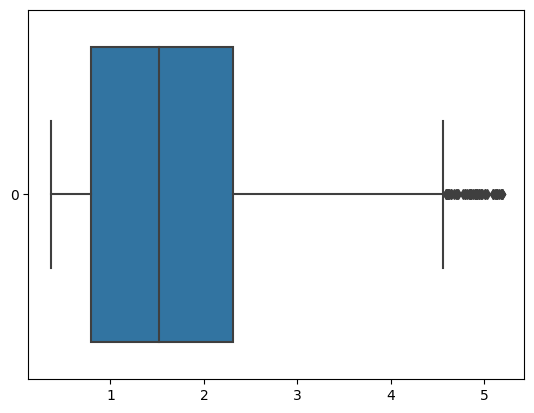

In [123]:
sns.boxplot(y_pred, orient='h')

<Axes: >

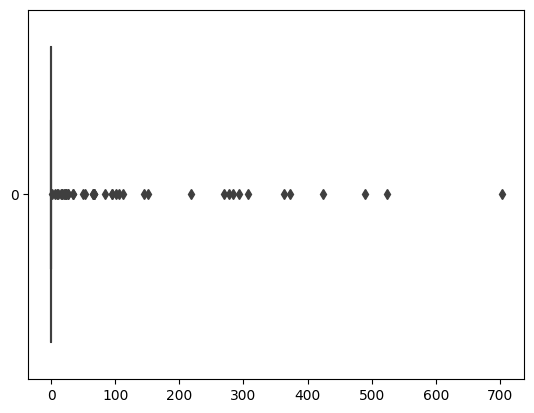

In [124]:
sns.boxplot(y_test, orient='h')

C:\Users\Predify\AppData\Local\Temp\ipykernel_24324\2342860189.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred - y_test)


<Axes: xlabel='transactionRevenue', ylabel='Density'>

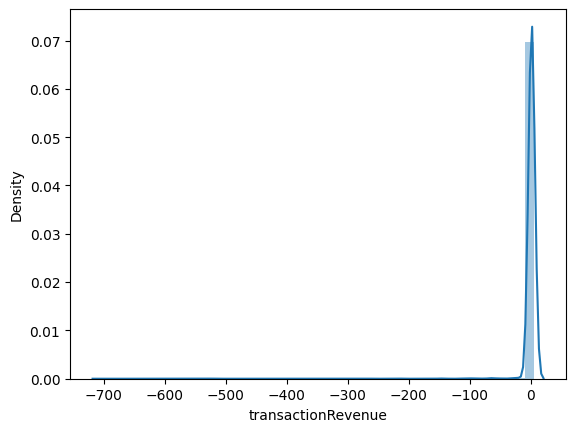

In [125]:
sns.distplot(y_pred - y_test)

In [126]:
df_clientes = df.groupby(['fullVisitorId'], as_index=False).visitNumber.max()
df_clientes

,fullVisitorId,visitNumber
0,231955209315461,2
1,266926879733529,1
2,852896709559982,1
3,1676995035957087,1
4,2365800130207040,1
...,...,...
9991,9996691020299725061,3
9992,9996793353803109760,1
9993,9997125062030599880,1
9994,9997464307347866920,1


In [127]:
df_sem_duplicados = df.drop_duplicates(subset=['fullVisitorId', 'visitNumber'])
df_sem_duplicados.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,networkDomain,campaign,source,medium,keyword,referralPath,adContent,hits,pageviews,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,1,1,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,1,1,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,1,1,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,comcast.net,(not set),google,organic,(not provided),NaN,NaN,1,1,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,att.net,(not set),google,organic,(not provided),NaN,NaN,5,4,0.0


In [128]:
df_clientes = pd.merge(df_clientes, df_sem_duplicados, left_on=['fullVisitorId', 'visitNumber'],
                        right_on=['fullVisitorId', 'visitNumber'], how='left')
df_clientes.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,...,networkDomain,campaign,source,medium,keyword,referralPath,adContent,hits,pageviews,transactionRevenue
0,231955209315461,2,Organic Search,20160927,231955209315461_1474986933,1474986933,1474986933,Chrome,iOS,True,...,more.net,(not set),google,organic,(not provided),NaN,NaN,3,3,0.0
1,266926879733529,1,Organic Search,20170118,266926879733529_1484803608,1484803608,1484803608,Chrome,Windows,False,...,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,16,12,0.0
2,852896709559982,1,Organic Search,20170725,852896709559982_1501014397,1501014397,1501014397,Safari,iOS,True,...,att.net,(not set),google,organic,(not provided),NaN,NaN,3,3,0.0
3,1676995035957087,1,Organic Search,20170612,001676995035957087_1497299834,1497299834,1497299834,Chrome,Android,True,...,(not set),(not set),google,organic,(not provided),NaN,NaN,1,1,0.0
4,2365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,wildpark.net,(not set),youtube.com,referral,NaN,/yt/about/ru/,NaN,1,1,0.0


In [129]:
primeira_visita = df.groupby('fullVisitorId', as_index=False)
primeira_visita = primeira_visita['visitNumber'].min()

primeira_visita.head()

,fullVisitorId,visitNumber
0,231955209315461,1
1,266926879733529,1
2,852896709559982,1
3,1676995035957087,1
4,2365800130207040,1


In [130]:
primeira_visita = primeira_visita.set_index('fullVisitorId')
primeira_visita.head()

,visitNumber
fullVisitorId,
231955209315461,1
266926879733529,1
852896709559982,1
1676995035957087,1
2365800130207040,1


In [131]:
df_clientes = df_clientes.join(primeira_visita, how='left', on='fullVisitorId', rsuffix='_primeira')
df_clientes.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,...,campaign,source,medium,keyword,referralPath,adContent,hits,pageviews,transactionRevenue,visitNumber_primeira
0,231955209315461,2,Organic Search,20160927,231955209315461_1474986933,1474986933,1474986933,Chrome,iOS,True,...,(not set),google,organic,(not provided),NaN,NaN,3,3,0.0,1
1,266926879733529,1,Organic Search,20170118,266926879733529_1484803608,1484803608,1484803608,Chrome,Windows,False,...,(not set),google,organic,(not provided),NaN,NaN,16,12,0.0,1
2,852896709559982,1,Organic Search,20170725,852896709559982_1501014397,1501014397,1501014397,Safari,iOS,True,...,(not set),google,organic,(not provided),NaN,NaN,3,3,0.0,1
3,1676995035957087,1,Organic Search,20170612,001676995035957087_1497299834,1497299834,1497299834,Chrome,Android,True,...,(not set),google,organic,(not provided),NaN,NaN,1,1,0.0,1
4,2365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,(not set),youtube.com,referral,NaN,/yt/about/ru/,NaN,1,1,0.0,1


In [132]:
df_clientes = pd.merge(df_clientes, df_sem_duplicados, left_on=['fullVisitorId', 'visitNumber_primeira'],
                       right_on=['fullVisitorId', 'visitNumber'], how='left', suffixes=['_ultima', '_primeira'])
df_clientes.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,...,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,referralPath_primeira,adContent_primeira,hits_primeira,pageviews_primeira,transactionRevenue_primeira
0,231955209315461,2,Organic Search,20160927,231955209315461_1474986933,1474986933,1474986933,Chrome,iOS,True,...,more.net,(not set),google,organic,(not provided),NaN,NaN,1,1,0.0
1,266926879733529,1,Organic Search,20170118,266926879733529_1484803608,1484803608,1484803608,Chrome,Windows,False,...,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,16,12,0.0
2,852896709559982,1,Organic Search,20170725,852896709559982_1501014397,1501014397,1501014397,Safari,iOS,True,...,att.net,(not set),google,organic,(not provided),NaN,NaN,3,3,0.0
3,1676995035957087,1,Organic Search,20170612,001676995035957087_1497299834,1497299834,1497299834,Chrome,Android,True,...,(not set),(not set),google,organic,(not provided),NaN,NaN,1,1,0.0
4,2365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,wildpark.net,(not set),youtube.com,referral,NaN,/yt/about/ru/,NaN,1,1,0.0


In [133]:
for coluna in quantitativas:
    if coluna + '_ultima' in df_clientes.columns:
        df_clientes = df_clientes.drop(columns=[coluna + '_ultima'], axis=1)
    if coluna + '_primeira' in df_clientes.columns:
        df_clientes = df_clientes.drop(columns=[coluna + '_primeira'], axis=1)

df_clientes.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,...,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,referralPath_primeira,adContent_primeira
0,231955209315461,2,Organic Search,20160927,231955209315461_1474986933,1474986933,1474986933,Chrome,iOS,True,...,Missouri,Kansas City MO,Kansas City,more.net,(not set),google,organic,(not provided),NaN,NaN
1,266926879733529,1,Organic Search,20170118,266926879733529_1484803608,1484803608,1484803608,Chrome,Windows,False,...,Maharashtra,(not set),Mumbai,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN
2,852896709559982,1,Organic Search,20170725,852896709559982_1501014397,1501014397,1501014397,Safari,iOS,True,...,Georgia,Atlanta GA,Atlanta,att.net,(not set),google,organic,(not provided),NaN,NaN
3,1676995035957087,1,Organic Search,20170612,001676995035957087_1497299834,1497299834,1497299834,Chrome,Android,True,...,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(not set),google,organic,(not provided),NaN,NaN
4,2365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,/yt/about/ru/,NaN


In [134]:
ids = ['sessionId_ultima', 'visitId_ultima', 'sessionId_primeira', 'visitId_primeira']

In [135]:
df_clientes = df_clientes.drop(columns=ids, axis=1)
df_clientes.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,referralPath_primeira,adContent_primeira
0,231955209315461,2,Organic Search,20160927,1474986933,Chrome,iOS,True,tablet,Americas,...,Missouri,Kansas City MO,Kansas City,more.net,(not set),google,organic,(not provided),NaN,NaN
1,266926879733529,1,Organic Search,20170118,1484803608,Chrome,Windows,False,desktop,Asia,...,Maharashtra,(not set),Mumbai,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN
2,852896709559982,1,Organic Search,20170725,1501014397,Safari,iOS,True,mobile,Americas,...,Georgia,Atlanta GA,Atlanta,att.net,(not set),google,organic,(not provided),NaN,NaN
3,1676995035957087,1,Organic Search,20170612,1497299834,Chrome,Android,True,mobile,Europe,...,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(not set),google,organic,(not provided),NaN,NaN
4,2365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,/yt/about/ru/,NaN


In [136]:
geograficas = ['city_primeira', 'continent_primeira', 'country_primeira', 'metro_primeira', 'region_primeira', 'networkDomain_primeira',
               'subContinent_primeira']

In [137]:
df_clientes = df_clientes.drop(columns=geograficas, axis=1)
df_clientes.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,referralPath_primeira,adContent_primeira
0,231955209315461,2,Organic Search,20160927,1474986933,Chrome,iOS,True,tablet,Americas,...,Chrome,iOS,True,tablet,(not set),google,organic,(not provided),NaN,NaN
1,266926879733529,1,Organic Search,20170118,1484803608,Chrome,Windows,False,desktop,Asia,...,Chrome,Windows,False,desktop,(not set),google,organic,(not provided),NaN,NaN
2,852896709559982,1,Organic Search,20170725,1501014397,Safari,iOS,True,mobile,Americas,...,Safari,iOS,True,mobile,(not set),google,organic,(not provided),NaN,NaN
3,1676995035957087,1,Organic Search,20170612,1497299834,Chrome,Android,True,mobile,Europe,...,Chrome,Android,True,mobile,(not set),google,organic,(not provided),NaN,NaN
4,2365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,/yt/about/ru/,NaN


In [141]:
df_clientes['fullVisitorId'] = df_clientes['fullVisitorId'].astype(str)

In [142]:
df_clientes = pd.merge(df_clientes, df_quantitativas, left_on='fullVisitorId', right_on='fullVisitorId', how='left')
df_clientes.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,referralPath_primeira,adContent_primeira,hits,pageviews,transactionRevenue
0,231955209315461,2,Organic Search,20160927,1474986933,Chrome,iOS,True,tablet,Americas,...,tablet,(not set),google,organic,(not provided),NaN,NaN,3,3,NaN
1,231955209315461,2,Organic Search,20160927,1474986933,Chrome,iOS,True,tablet,Americas,...,tablet,(not set),google,organic,(not provided),NaN,NaN,1,1,NaN
2,266926879733529,1,Organic Search,20170118,1484803608,Chrome,Windows,False,desktop,Asia,...,desktop,(not set),google,organic,(not provided),NaN,NaN,16,12,NaN
3,852896709559982,1,Organic Search,20170725,1501014397,Safari,iOS,True,mobile,Americas,...,mobile,(not set),google,organic,(not provided),NaN,NaN,3,3,NaN
4,1676995035957087,1,Organic Search,20170612,1497299834,Chrome,Android,True,mobile,Europe,...,mobile,(not set),google,organic,(not provided),NaN,NaN,1,1,NaN


In [143]:
df_clientes['diferenca_tempo'] = df_clientes['visitStartTime_ultima'] - df_clientes['visitStartTime_primeira']
df_clientes['diferenca_tempo']

0        77157
1        77157
2            0
3            0
4            0
         ...  
12242        0
12243        0
12244        0
12245    14166
12246    14166
Name: diferenca_tempo, Length: 12247, dtype: int64

In [145]:
df_numero_visitas = df.groupby(['fullVisitorId'], as_index=False).count()[['fullVisitorId', 'visitNumber']]
df_numero_visitas.head()

,fullVisitorId,visitNumber
0,231955209315461,2
1,266926879733529,1
2,852896709559982,1
3,1676995035957087,1
4,2365800130207040,1


In [147]:
df_numero_visitas['fullVisitorId'] = df_numero_visitas['fullVisitorId'].astype(str)

In [148]:
df_clientes = df_clientes.merge(df_numero_visitas.rename(columns={'visitNumber':'numero_visitas'}), on='fullVisitorId', how='left')
df_clientes.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,source_primeira,medium_primeira,keyword_primeira,referralPath_primeira,adContent_primeira,hits,pageviews,transactionRevenue,diferenca_tempo,numero_visitas
0,231955209315461,2,Organic Search,20160927,1474986933,Chrome,iOS,True,tablet,Americas,...,google,organic,(not provided),NaN,NaN,3,3,NaN,77157,2
1,231955209315461,2,Organic Search,20160927,1474986933,Chrome,iOS,True,tablet,Americas,...,google,organic,(not provided),NaN,NaN,1,1,NaN,77157,2
2,266926879733529,1,Organic Search,20170118,1484803608,Chrome,Windows,False,desktop,Asia,...,google,organic,(not provided),NaN,NaN,16,12,NaN,0,1
3,852896709559982,1,Organic Search,20170725,1501014397,Safari,iOS,True,mobile,Americas,...,google,organic,(not provided),NaN,NaN,3,3,NaN,0,1
4,1676995035957087,1,Organic Search,20170612,1497299834,Chrome,Android,True,mobile,Europe,...,google,organic,(not provided),NaN,NaN,1,1,NaN,0,1


In [149]:
df_clientes['ano_ultima'] = pd.to_numeric([data[0:4] for data in df_clientes['date_ultima']])
df_clientes['mes_ultima'] = pd.to_numeric([data[4:6] for data in df_clientes['date_ultima']])
df_clientes['dia_ultima'] = pd.to_numeric([data[6:8] for data in df_clientes['date_ultima']])

df_clientes.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,referralPath_primeira,adContent_primeira,hits,pageviews,transactionRevenue,diferenca_tempo,numero_visitas,ano_ultima,mes_ultima,dia_ultima
0,231955209315461,2,Organic Search,20160927,1474986933,Chrome,iOS,True,tablet,Americas,...,NaN,NaN,3,3,NaN,77157,2,2016,9,27
1,231955209315461,2,Organic Search,20160927,1474986933,Chrome,iOS,True,tablet,Americas,...,NaN,NaN,1,1,NaN,77157,2,2016,9,27
2,266926879733529,1,Organic Search,20170118,1484803608,Chrome,Windows,False,desktop,Asia,...,NaN,NaN,16,12,NaN,0,1,2017,1,18
3,852896709559982,1,Organic Search,20170725,1501014397,Safari,iOS,True,mobile,Americas,...,NaN,NaN,3,3,NaN,0,1,2017,7,25
4,1676995035957087,1,Organic Search,20170612,1497299834,Chrome,Android,True,mobile,Europe,...,NaN,NaN,1,1,NaN,0,1,2017,6,12


In [150]:
df_clientes['ano_primeira'] = pd.to_numeric([data[0:4] for data in df_clientes['date_primeira']])
df_clientes['mes_primeira'] = pd.to_numeric([data[4:6] for data in df_clientes['date_primeira']])
df_clientes['dia_primeira'] = pd.to_numeric([data[6:8] for data in df_clientes['date_primeira']])

df_clientes.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,pageviews,transactionRevenue,diferenca_tempo,numero_visitas,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,231955209315461,2,Organic Search,20160927,1474986933,Chrome,iOS,True,tablet,Americas,...,3,NaN,77157,2,2016,9,27,2016,9,26
1,231955209315461,2,Organic Search,20160927,1474986933,Chrome,iOS,True,tablet,Americas,...,1,NaN,77157,2,2016,9,27,2016,9,26
2,266926879733529,1,Organic Search,20170118,1484803608,Chrome,Windows,False,desktop,Asia,...,12,NaN,0,1,2017,1,18,2017,1,18
3,852896709559982,1,Organic Search,20170725,1501014397,Safari,iOS,True,mobile,Americas,...,3,NaN,0,1,2017,7,25,2017,7,25
4,1676995035957087,1,Organic Search,20170612,1497299834,Chrome,Android,True,mobile,Europe,...,1,NaN,0,1,2017,6,12,2017,6,12
